# Feature Selection
In this section, we aim to identify the most relevant features for predicting heart disease. Feature selection helps improve model accuracy by reducing noise and dimensionality, which leads to faster training and better generalization.

We will explore techniques to select key variables that contribute most to the prediction task, while eliminating redundant or irrelevant features.

## Load Dataset and Import Libraries for Feature Selection

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/processed_heart.csv')


## Feature Importance Using Random Forest
In this step, we separate the features (X) from the target variable (y).
We scale the features using StandardScaler to normalize the data before fitting the model.
Then, we train a RandomForestClassifier and extract feature importances to understand which features contribute most to the prediction.
Finally, we visualize the feature importances using a bar plot.

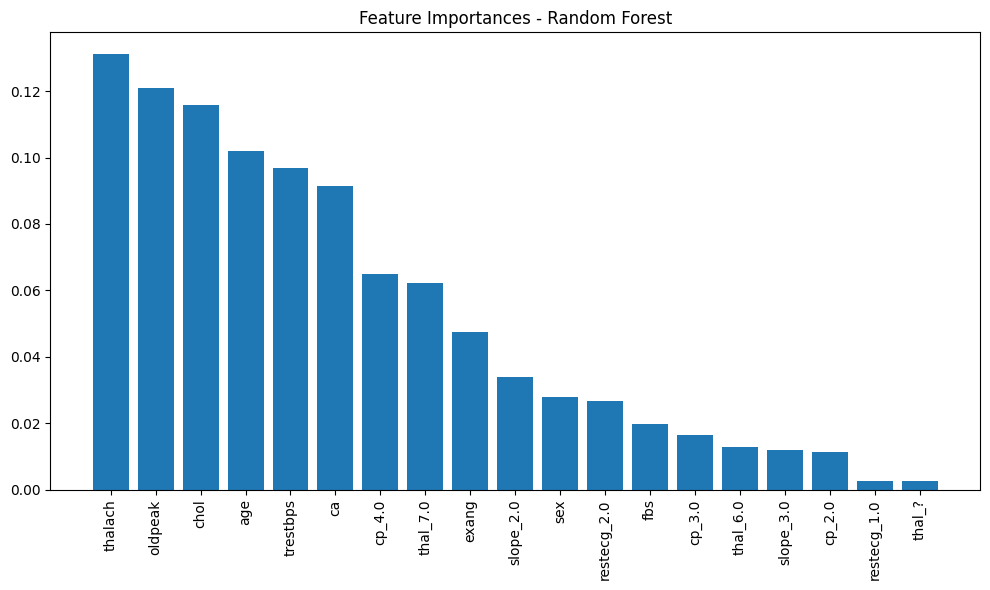

In [3]:

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_scaled, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_scaled.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


## Print Feature Importances in Order

In [4]:
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")

thalach: 0.1311
oldpeak: 0.1211
chol: 0.1158
age: 0.1021
trestbps: 0.0969
ca: 0.0916
cp_4.0: 0.0650
thal_7.0: 0.0623
exang: 0.0475
slope_2.0: 0.0339
sex: 0.0280
restecg_2.0: 0.0268
fbs: 0.0198
cp_3.0: 0.0165
thal_6.0: 0.0129
slope_3.0: 0.0121
cp_2.0: 0.0114
restecg_1.0: 0.0026
thal_?: 0.0026


## Feature Selection Using Recursive Feature Elimination (RFE)
This code applies Recursive Feature Elimination (RFE) with a Logistic Regression model to select the top 7 most important features.
RFE works by recursively removing less important features and building the model repeatedly until the desired number of features is reached.
The selected features are then printed out.

In [5]:

model = LogisticRegression(max_iter=5000)
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X_scaled, y)

print("RFE Selected Features:")
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(X.columns[i])

RFE Selected Features:
sex
thalach
oldpeak
ca
cp_4.0
slope_2.0
thal_7.0


## Feature Selection Using ANOVA F-test (SelectKBest)
This code uses the ANOVA F-test to select the top 7 features that have the strongest relationship with the target variable.
The SelectKBest method ranks features based on their ANOVA F-scores, which measure how well each feature discriminates between the classes.
The selected features are then printed

In [6]:
f_selector = SelectKBest(f_classif, k=7)
X_kbest = f_selector.fit_transform(X, y)
mask = f_selector.get_support()
selected_features = X.columns[mask]
print("ANOVA F-test Selected Features:", selected_features)


ANOVA F-test Selected Features: Index(['thalach', 'exang', 'oldpeak', 'ca', 'cp_4.0', 'slope_2.0', 'thal_7.0'], dtype='object')


## Creating a New Dataset with Selected Features
After selecting the important features using the ANOVA F-test, this code creates a new DataFrame that contains only these selected features plus the target variable.
This reduced dataset can be used for further analysis or modeling.

In [7]:
X_selected = X[selected_features] 
df_selected = pd.concat([X_selected, y], axis=1) 
print(df_selected.head())


   thalach  exang  oldpeak   ca  cp_4.0  slope_2.0  thal_7.0  target
0    150.0    0.0      2.3  0.0       0          0         0       0
1    108.0    1.0      1.5  3.0       1          1         0       2
2    129.0    1.0      2.6  2.0       1          1         1       1
3    187.0    0.0      3.5  0.0       0          0         0       0
4    172.0    0.0      1.4  0.0       0          0         0       0


## Saving the Selected Features Dataset
This line saves the new dataset with the selected features and target variable into a CSV file.
This makes it easy to reuse the cleaned and feature-selected data later without repeating the selection process.

In [8]:
df_selected.to_csv('../Data/selected_features.csv', index=False)

## Scaling the Selected Features
In this step, we take the features selected previously and apply standard scaling to them.
StandardScaler transforms the data so that each feature has a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.

We then combine the scaled features with the target variable into a new DataFrame for further use or modeling.

In [9]:
X_selected = X[selected_features]
target = y
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_selected)
features_scaled_df = pd.DataFrame(features_scaled, columns=X_selected.columns)
df_scaled = pd.concat([features_scaled_df, target.reset_index(drop=True)], axis=1)
print(df_scaled.head())

    thalach     exang   oldpeak        ca    cp_4.0  slope_2.0  thal_7.0  \
0  0.017197 -0.696631  1.087338 -0.711131 -0.951662  -0.926766 -0.793116   
1 -1.821905  1.435481  0.397182  2.504881  1.050793   1.079021 -0.793116   
2 -0.902354  1.435481  1.346147  1.432877  1.050793   1.079021  1.260850   
3  1.637359 -0.696631  2.122573 -0.711131 -0.951662  -0.926766 -0.793116   
4  0.980537 -0.696631  0.310912 -0.711131 -0.951662  -0.926766 -0.793116   

   target  
0       0  
1       2  
2       1  
3       0  
4       0  


## Saving the Scaled Features Dataset
Save the scaled features along with the target variable into a CSV file.
This file can be used later for training or evaluation.

In [10]:
df_scaled.to_csv('../Data/selected_features_scaled.csv', index=False)
